In the ever-evolving landscape of financial markets, investors are constantly seeking new tools and methodologies to gain a competitive edge. One such tool that has gained traction in recent years is Facebook Prophet, an open-source forecasting tool designed to handle time series data with ease. In this article, we will explore the application of Facebook Prophet in stock forecasting, shedding light on its capabilities and providing a step-by-step guide to leverage its power.

# Understanding Facebook Prophet
Facebook Prophet is a forecasting tool developed by the research team at Facebook. It is particularly well-suited for time series data, making it an ideal candidate for predicting stock prices. Unlike traditional forecasting methods, Prophet is capable of handling missing data, outliers, and holidays, making it a versatile choice for financial data analysis.



# Getting Started

In [21]:
# Libraries
# Install the Prophet library using pip
!pip install prophet

# Import necessary libraries
import pandas as pd
from prophet import Prophet
from datetime import datetime

# Ignore any warning messages
import warnings
warnings.filterwarnings("ignore")

# Import yfinance library and override its pandas_datareader
# This is done to enable the download of historical stock data
import yfinance as yf
yf.pdr_override()


In [30]:
# Define the stock symbol
stock = 'AMD'  # Input the stock symbol of interest

# Define the start and end dates for fetching historical data
start = '2020-01-01'  # Input the start date for historical data
end = date.today()     # Use the current date as the end date

# Download historical stock data using Yahoo Finance
df = yf.download(stock, start, end)

# Display the first few rows of the downloaded data
print(df.head())


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  46.860001  49.250000  46.630001  49.099998  49.099998  80331100
2020-01-03  48.029999  49.389999  47.540001  48.599998  48.599998  73127400
2020-01-06  48.020000  48.860001  47.860001  48.389999  48.389999  47934900
2020-01-07  49.349998  49.389999  48.040001  48.250000  48.250000  58061400
2020-01-08  47.849998  48.299999  47.139999  47.830002  47.830002  53767000


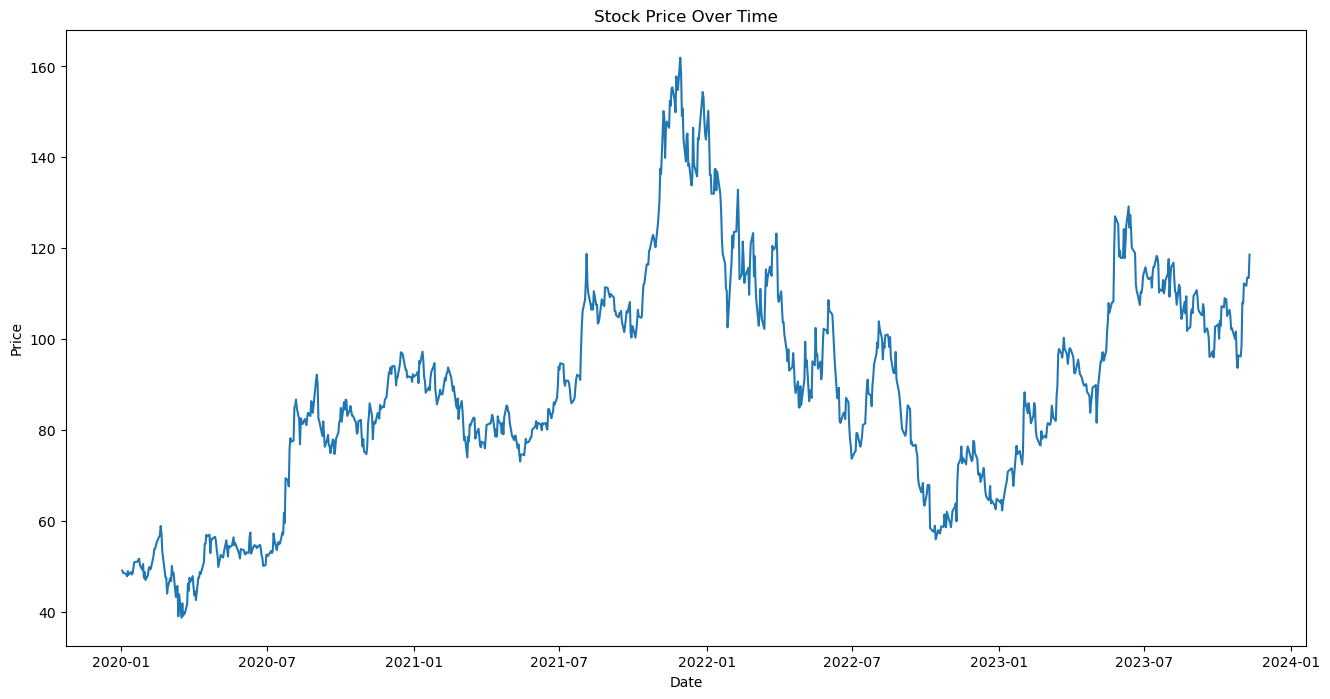

In [25]:
# Visualize the historical stock prices
plt.figure(figsize=(16, 8))
plt.plot(df['Adj Close'])  # Plotting the 'Adj Close' prices
plt.title('Stock Price Over Time')  # Setting the title of the plot
plt.xlabel('Date')  # Setting the label for the x-axis
plt.ylabel('Price')  # Setting the label for the y-axis
plt.show()  # Display the plot


In [31]:
# Resetting index to make 'Date' a regular column
df = df.reset_index()

# Selecting the 'Date' (ds) and 'Close' (y) columns from the stock_data DataFrame
df = df[['Date', 'Close']]

# Renaming columns for compatibility with Prophet
# 'Date' is renamed to 'ds' (datestamp), and 'Close' is renamed to 'y' (target variable)
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Display the modified DataFrame
df

,ds,y
0,2020-01-02,49.099998
1,2020-01-03,48.599998
2,2020-01-06,48.389999
3,2020-01-07,48.250000
4,2020-01-08,47.830002
...,...,...
968,2023-11-06,111.750000
969,2023-11-07,113.449997
970,2023-11-08,113.589996
971,2023-11-09,113.489998


In [33]:
# Instantiate Prophet model
m = Prophet()

# Fit the model with historical stock data
m.fit(df)  # The model is trained using the historical stock data

# The model is now ready to make predictions on future dates
# It has learned patterns and trends from the historical data

# The trained model (m) can be used to generate forecasts for future dates
# This involves creating a dataframe with future dates and using the predict method


03:08:46 - cmdstanpy - INFO - Chain [1] start processing
03:08:46 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
# Create a dataframe with future dates for prediction
# The `periods` parameter determines how many future data points to create
future = m.make_future_dataframe(periods=365)  # Generating 365 days (1 year) of future dates

# Display the last few rows of the future dataframe to inspect the generated dates
future.tail()


,ds
1333,2024-11-05
1334,2024-11-06
1335,2024-11-07
1336,2024-11-08
1337,2024-11-09


In [37]:
# Generate predictions for the future dates using the fitted model
forecast = m.predict(future)

# Display the last few rows of the forecast dataframe, including the predicted values and uncertainty intervals
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1333,2024-11-05,177.819792,134.151951,223.125565
1334,2024-11-06,178.987567,134.254821,226.453365
1335,2024-11-07,180.095549,134.498810,227.417603
1336,2024-11-08,181.274269,133.811315,229.768351
1337,2024-11-09,188.388568,141.148912,234.225646


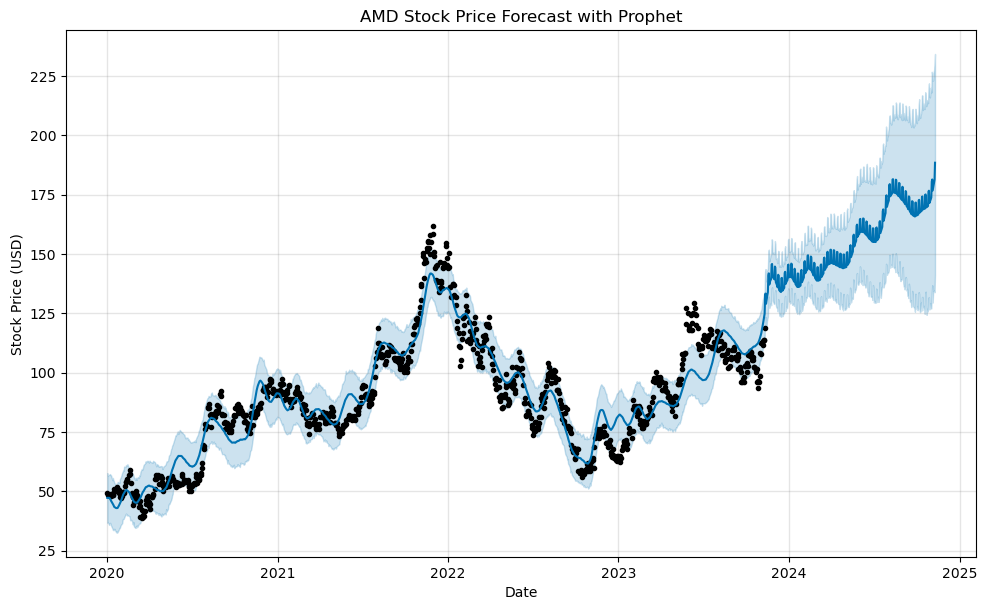

In [40]:
# Visualize the forecast
fig1 = m.plot(forecast)

# Add title to the plot
plt.title(f'{stock} Stock Price Forecast with Prophet')

# Label the x-axis
plt.xlabel('Date')

# Label the y-axis
plt.ylabel('Stock Price (USD)')

# Display the plot
plt.show()


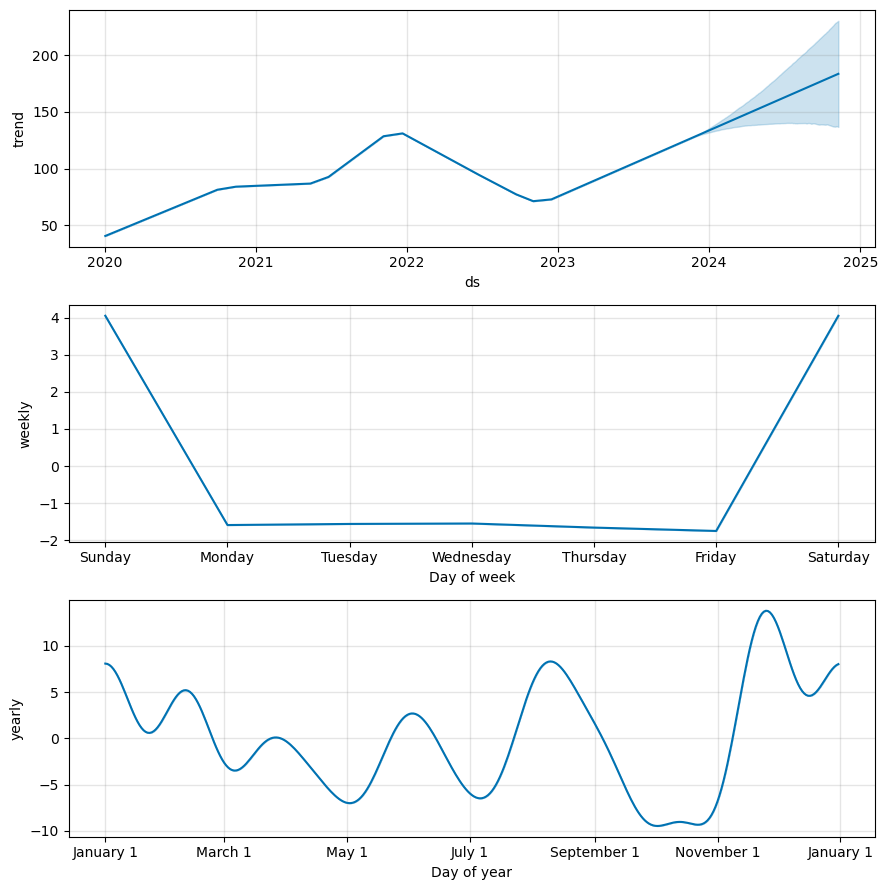

In [43]:
# Visualize components of the forecast
fig2 = m.plot_components(forecast)

plt.show()